In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

import warnings 
warnings.filterwarnings("ignore")

#here i removed grangercausality test since i already know about them

In [194]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
data1 = pd.read_csv(url, parse_dates = ['date'], index_col = 'date')

In [195]:
data_columns = data1.columns
data_columns

Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

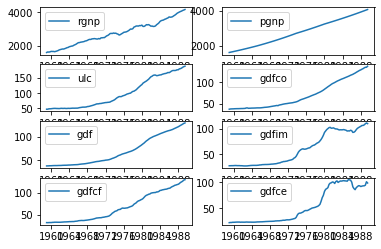

In [196]:
for i,j in zip(data_columns, range(1,len(data_columns)+1)):
    plt.subplot(4,2,j)
    plt.plot(data1[i], label = data_columns[j-1])
    plt.legend(loc = 'best')
    

In [197]:
data = data1[['gdfim', 'gdfce']]
data2 = data1[['gdfim', 'gdfce']]
data_columns = data.columns
data_columns

Index(['gdfim', 'gdfce'], dtype='object')

In [198]:
for i in data_columns:
    adfuller_result_pgnp = adfuller(data[i].diff()[1:])
    print("ADF statistics "+i+"  : ", adfuller_result_pgnp[0])
    print("P value : "+i+" ", adfuller_result_pgnp[1])

ADF statistics gdfim  :  -4.244421412664248
P value : gdfim  0.000553653708669569
ADF statistics gdfce  :  -2.044709590959794
P value : gdfce  0.2673198799246977


# Gangercausalitytest

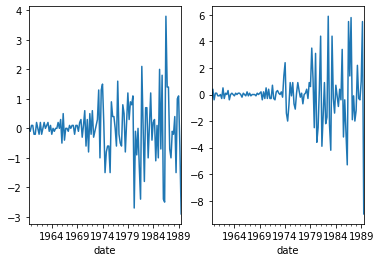

In [199]:
data['gdfim'] = data['gdfim'].diff()[1:]
data['gdfce'] = data['gdfce'].diff()[1:]
data['gdfce'] = data['gdfce'].diff()[1:]
data['gdfim'] = data['gdfim'].diff()[1:]
data = data[['gdfce','gdfim']]
data = data.dropna()
plt.subplot(1,2,1)
data['gdfim'].plot()
plt.subplot(1,2,2)
data['gdfce'].plot()

In [200]:
data

,gdfce,gdfim
date,,
1959-07-01,-0.3,0.0
1959-10-01,0.4,-0.1
1960-01-01,-0.4,0.1
1960-04-01,0.1,0.1
1960-07-01,0.1,-0.2
...,...,...
1988-07-01,-0.3,-1.5
1988-10-01,-0.4,1.0
1989-01-01,1.0,1.1


In [201]:
print('gdfim impacted by gdfce?\n')
print('------------------')
granger_1 = grangercausalitytests(data[['gdfim', 'gdfce']], 4)

gdfim impacted by gdfce?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0924  , p=0.7617  , df_denom=117, df_num=1
ssr based chi2 test:   chi2=0.0947  , p=0.7582  , df=1
likelihood ratio test: chi2=0.0947  , p=0.7583  , df=1
parameter F test:         F=0.0924  , p=0.7617  , df_denom=117, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1010  , p=0.9040  , df_denom=114, df_num=2
ssr based chi2 test:   chi2=0.2109  , p=0.8999  , df=2
likelihood ratio test: chi2=0.2107  , p=0.9000  , df=2
parameter F test:         F=0.1010  , p=0.9040  , df_denom=114, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1661  , p=0.9190  , df_denom=111, df_num=3
ssr based chi2 test:   chi2=0.5298  , p=0.9123  , df=3
likelihood ratio test: chi2=0.5287  , p=0.9126  , df=3
parameter F test:         F=0.1661  , p=0.9190  , df_denom=111, df_num=3

Granger Causality
number of lags (no zero) 4
ssr

In [202]:
print('gdfce impacted by gdfim?\n')
print('------------------')
granger_1 = grangercausalitytests(data[['gdfce', 'gdfim']], 4)

gdfce impacted by gdfim?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1202  , p=0.2921  , df_denom=117, df_num=1
ssr based chi2 test:   chi2=1.1489  , p=0.2838  , df=1
likelihood ratio test: chi2=1.1435  , p=0.2849  , df=1
parameter F test:         F=1.1202  , p=0.2921  , df_denom=117, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2363  , p=0.1115  , df_denom=114, df_num=2
ssr based chi2 test:   chi2=4.6688  , p=0.0969  , df=2
likelihood ratio test: chi2=4.5795  , p=0.1013  , df=2
parameter F test:         F=2.2363  , p=0.1115  , df_denom=114, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9526  , p=0.1253  , df_denom=111, df_num=3
ssr based chi2 test:   chi2=6.2273  , p=0.1011  , df=3
likelihood ratio test: chi2=6.0686  , p=0.1083  , df=3
parameter F test:         F=1.9526  , p=0.1253  , df_denom=111, df_num=3

Granger Causality
number of lags (no zero) 4
ssr

In [212]:
#here gdfce impacted by gdfim since approx all p values less than 0.5, the use of gangercausality test is whether is an relation
#between two columns (or) features or not..... since we have found gdfim is impacting gdfce we continue with these two further
#we use VAR model if there is an relation between two datasets

In [204]:
train_data = data2[:-6]
test_data = data2[-6:]
train_data.shape, test_data.shape
train_data

,gdfim,gdfce
date,,
1959-01-01,26.9,23.1
1959-04-01,27.0,23.4
1959-07-01,27.1,23.4
1959-10-01,27.1,23.8
1960-01-01,27.2,23.8
...,...,...
1987-01-01,97.9,89.4
1987-04-01,100.4,91.3
1987-07-01,101.9,93.1


In [205]:
model = VAR(train_data)

sorted_order = model.select_order(maxlags = 20)
sorted_order.summary()

,AIC,BIC,FPE,HQIC
0,10.55,10.61,3.828e+04,10.57
1,1.025,1.184,2.786,1.089
2,0.4180,0.6834*,1.519,0.5253
3,0.4736,0.8452,1.607,0.6239
4,0.5197,0.9975,1.683,0.7129
5,0.5862,1.170,1.801,0.8223
6,0.5839,1.274,1.799,0.8629
7,0.4668,1.263,1.603,0.7888
8,0.5334,1.436,1.717,0.8983
9,0.4900,1.499,1.649,0.8978


In [206]:
results = model.fit(6)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, Dec, 2021
Time:                     19:29:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.896856
Nobs:                     111.000    HQIC:                  0.519656
Log likelihood:          -303.556    FPE:                    1.30259
AIC:                     0.262191    Det(Omega_mle):         1.04378
--------------------------------------------------------------------
Results for equation gdfim
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.230201         0.221848           -1.038           0.299
L1.gdfim         1.634262         0.122916           13.296           0.000
L1.gdfce         0.000799         0.071202            0.011           0.991
L2.g

In [211]:
result = results.forecast(train_data.values[6:], steps = 6)
result

array([[105.75926107,  92.40911004],
       [107.3043998 ,  94.41743016],
       [109.0687392 ,  96.45064362],
       [111.02153593,  98.89784084],
       [113.03679807, 101.39319918],
       [114.95255271, 103.60667007]])

In [208]:
k = []
for i in range(0,6):
    k.append(result[i,0])
    
j = []
for i in range(0,6):
    j.append(result[i,1])
    
    
test_data['gdfim_predicted'] = k
test_data['gdfce_predicted'] = j
test_data

,gdfim,gdfce,gdfim_predicted,gdfce_predicted
date,,,,
1988-04-01,106.1,92.3,105.759261,92.409110
1988-07-01,106.2,92.8,107.304400,94.417430
1988-10-01,107.3,92.9,109.068739,96.450644
1989-01-01,109.5,94.0,111.021536,98.897841
1989-04-01,111.1,100.6,113.036798,101.393199
1989-07-01,109.8,98.2,114.952553,103.606670


In [209]:
data2['gdfim_predicted'] = test_data['gdfim_predicted']
data2['gdfce_predicted'] = test_data['gdfce_predicted']

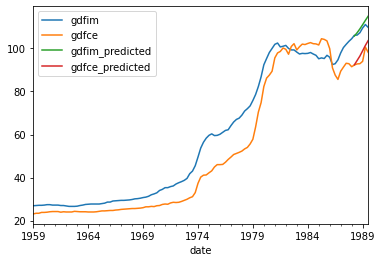

In [210]:
data2.plot()